# Plataforma de trabajo: Google Colaboratory


In [18]:
import numpy as np
import pandas as pd
import json
import ast
from ast import literal_eval

file_path = '/content/drive/MyDrive/yelp/Copia de business.pkl'

df = pd.read_pickle(file_path)

df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
dtype: object

In [ ]:
df.iloc[4]

business_id                                mWMc6_wTdE0EUBKIGXDVfA
name                                     Perkiomen Valley Brewery
address                                             101 Walnut St
city                                                   Green Lane
state                                                          MO
postal_code                                                 18054
latitude                                                40.338183
longitude                                              -75.471659
stars                                                         4.5
review_count                                                   13
is_open                                                         1
attributes      {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
categories                              Brewpubs, Breweries, Food
hours           {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
business_id                                                   NaN
name      

In [19]:
df_no_duplicate_cols = df.loc[:, ~df.columns.duplicated()].copy()
df_no_duplicate_cols.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [ ]:
df_no_duplicate_cols.dtypes

business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
dtype: object

In [ ]:
df_no_duplicate_cols.iloc[0]

business_id                                Pns2l4eNsfO8kk83dixA6A
name                                     Abby Rappoport, LAC, CMQ
address                                    1616 Chapala St, Ste 2
city                                                Santa Barbara
state                                                         NaN
postal_code                                                 93101
latitude                                                34.426679
longitude                                             -119.711197
stars                                                         5.0
review_count                                                    7
is_open                                                         0
attributes                          {'ByAppointmentOnly': 'True'}
categories      Doctors, Traditional Chinese Medicine, Naturop...
hours                                                        None
Name: 0, dtype: object

In [ ]:
df_no_duplicate_cols['categories'].iloc[0]

'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists'

# 1. From the view above we're gonna need to flatten dictionaries or lists of dictionaries.

A. Column attributes.

B. column categories.

C. Column hours.

Decidimos centrarnos en Florida!!!


# 1.1 Pasos Previos a desanidada:

Filtramos primero por codigo postal, luego filtramos solo ciudades, corregimos la columna 'state' y filtramos las categorias y subcategorias mas importantes.

In [20]:
# FILTRO POR CODIGO POSTAL

# Convert postal codes to numeric, handling NaN values
df_no_duplicate_cols['postal_code'] = pd.to_numeric(df_no_duplicate_cols['postal_code'], errors='coerce') # df_no_duplicate_cols

# Filter rows with postal codes between 32003 and 39819
df_filtered_by_code_postal_FLORIDA = df_no_duplicate_cols[(df_no_duplicate_cols['postal_code'] >= 32003) & (df_no_duplicate_cols['postal_code'] <= 34997)].copy()
# According to website https://www.zipcode.com.ng/2022/06/list-of-florida-zip-codes-.html

In [21]:
# FILTRO POR CIUDADES FLORIDA

df_florida_cities = pd.read_json('/content/drive/MyDrive/Otros/us-cities-table-for-florida.json')
# Fuente Json https://worldpopulationreview.com/states/cities/florida

florida_names_list = df_florida_cities['name'].tolist()

florida_cities_postal_code = df_filtered_by_code_postal_FLORIDA[df_filtered_by_code_postal_FLORIDA['city'].isin(florida_names_list)]



In [23]:
# CORREGIMOS COLUMNA STATE

florida_cities_postal_code.loc[:, 'state'] = 'FL'

florida_cities_postal_code = florida_cities_postal_code.copy()

florida_cities_postal_code.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707.0,27.76659,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755.0,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': 'True'},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771.0,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."


In [24]:
# 12 CATEGORIAS MAS IMPORTANTES EN YELP
# Dividir las categorías en subcategorías y contarlas
subcategories = florida_cities_postal_code['categories'].str.split(', ').explode()

# INcluded categories
categories = [
    'Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas',
    'Education', 'Event Planning & Services', 'Financial Services', 'Food',
    'Health & Medical', 'Home Services', 'Hotels & Travel', 'Local Flavor',
    'Local Services', 'Mass Media', 'Nightlife', 'Pets', 'Professional Services',
    'Public Services & Government', 'Real Estate', 'Religious Organizations',
    'Restaurants', 'Shopping'
]
#Fuente: https://blog.yelp.com/businesses/yelp_category_list/


# Filtering categories from excluded list and calculating counts
category_counts = subcategories[subcategories.isin(categories)].value_counts() / len(florida_cities_postal_code)

# Getting the top 12 category names
top_category_names = category_counts.head(12).index.tolist()

print(top_category_names)

# Mostrar el conteo de subcategorías in/excluidas
category_counts.head(12)

['Restaurants', 'Food', 'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical', 'Automotive', 'Local Services', 'Active Life', 'Event Planning & Services', 'Hotels & Travel']


Restaurants                  0.336282
Food                         0.184610
Shopping                     0.151950
Home Services                0.109442
Beauty & Spas                0.097646
Nightlife                    0.086129
Health & Medical             0.084849
Automotive                   0.075335
Local Services               0.075001
Active Life                  0.062594
Event Planning & Services    0.061704
Hotels & Travel              0.043621
Name: categories, dtype: float64

In [25]:
# 12 SUBCATEGORIAS MAS IMPORTANTES

subcategories = florida_cities_postal_code['categories'].str.split(', ').explode()

excluded_categories = [
    'Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas',
    'Education', 'Event Planning & Services', 'Financial Services', 'Food',
    'Health & Medical', 'Home Services', 'Hotels & Travel', 'Local Flavor',
    'Local Services', 'Mass Media', 'Nightlife', 'Pets', 'Professional Services',
    'Public Services & Government', 'Real Estate', 'Religious Organizations',
    'Restaurants', 'Shopping'
]

filtered_subcategory_counts = subcategories[~subcategories.isin(excluded_categories)].value_counts() / len(florida_cities_postal_code)

top_subcategory_names = filtered_subcategory_counts.head(12).index.tolist()

filtered_subcategory_counts.head(12)

Bars                      0.079119
American (Traditional)    0.055917
Sandwiches                0.055806
Coffee & Tea              0.042619
Breakfast & Brunch        0.041896
Fast Food                 0.039392
American (New)            0.038780
Pizza                     0.037779
Home & Garden             0.036054
Auto Repair               0.034051
Burgers                   0.033439
Hair Salons               0.032493
Name: categories, dtype: float64

In [26]:
# Unificamos listas

concatenated_list = top_category_names + top_subcategory_names
concatenated_list

['Restaurants',
 'Food',
 'Shopping',
 'Home Services',
 'Beauty & Spas',
 'Nightlife',
 'Health & Medical',
 'Automotive',
 'Local Services',
 'Active Life',
 'Event Planning & Services',
 'Hotels & Travel',
 'Bars',
 'American (Traditional)',
 'Sandwiches',
 'Coffee & Tea',
 'Breakfast & Brunch',
 'Fast Food',
 'American (New)',
 'Pizza',
 'Home & Garden',
 'Auto Repair',
 'Burgers',
 'Hair Salons']

In [27]:
# A. COLUMN ATTRIBUTES

print(florida_cities_postal_code.iloc[5]['attributes'])
print(type(florida_cities_postal_code.iloc[5]['attributes']))

{'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'BikeParking': 'False', 'OutdoorSeating': 'True', 'RestaurantsDelivery': 'False', 'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'BusinessAcceptsCreditCards': 'True', 'Caters': 'True', 'NoiseLevel': "u'quiet'", 'WiFi': "'no'", 'HasTV': 'True', 'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}", 'RestaurantsAttire': "u'casual'", 'RestaurantsReservations': 'True', 'Alcohol': "u'full_bar'", 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2'}
<class 'dict'>


'RestaurantsPriceRange2'

'BusinessAcceptsCreditCards'

'Ambience'

'RestaurantsDelivery'


In [ ]:
desired_keys = ['RestaurantsPriceRange2', 'BusinessAcceptsCreditCards', 'Ambience', 'RestaurantsDelivery']

# Define the function to format the attributes dictionary
def format_attributes_dict(attributes_dict):
    if isinstance(attributes_dict, dict):
        filtered_dict = {k: attributes_dict[k] for k in desired_keys if k in attributes_dict}
        return filtered_dict
    else:
        return attributes_dict

# Apply the function to the 'attributes' column
florida_cities_postal_code['attributes'] = florida_cities_postal_code['attributes'].apply(format_attributes_dict)

# Create new columns from the filtered attributes dictionary
#florida_cities_postal_code = pd.concat([florida_cities_postal_code.drop('attributes', axis=1), florida_cities_postal_code['attributes'].apply(pd.Series)], axis=1)
florida_cities_postal_code = pd.concat([florida_cities_postal_code, florida_cities_postal_code['attributes'].apply(pd.Series)], axis=1)


In [29]:
florida_cities_postal_code.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,RestaurantsPriceRange2,BusinessAcceptsCreditCards,Ambience,RestaurantsDelivery
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707.0,27.76659,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",NaN,NaN,NaN,NaN
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755.0,27.966235,-82.787412,5.0,10,1,{},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3...",NaN,NaN,NaN,NaN
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771.0,27.916116,-82.760461,4.5,100,0,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",1,True,"{'romantic': False, 'intimate': False, 'touris...",True


In [30]:
print(type(florida_cities_postal_code['Ambience'].iloc[15]))
florida_cities_postal_code['Ambience'].iloc[15]

<class 'str'>


"{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}"

In [31]:
florida_cities_postal_code['Ambience'] = florida_cities_postal_code['Ambience'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

desired_keys = ['touristy', 'hipster', 'romantic','divey','intimate','trendy','upscale', 'classy', 'casual']

def format_misc_dict(misc_dict):
    if isinstance(misc_dict, dict):
        filtered_dict = {k: misc_dict[k] for k in desired_keys if k in misc_dict}
        formatted_misc = ', '.join([f"{key}_{', '.join(value) if isinstance(value, (list, tuple)) else str(value)}" for key, value in filtered_dict.items()])
        return formatted_misc
    else:
        return misc_dict

# Applying function
florida_cities_postal_code['Ambience'] = florida_cities_postal_code['Ambience'].apply(format_misc_dict)

# Create binary indicator columns for each Ambience
category_dummies = florida_cities_postal_code['Ambience'].str.get_dummies(sep=', ')
df_new = pd.concat([florida_cities_postal_code, category_dummies], axis=1)

florida_cities_postal_code = df_new
florida_cities_postal_code.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,romantic_True,touristy_False,touristy_None,touristy_True,trendy_False,trendy_None,trendy_True,upscale_False,upscale_None,upscale_True
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707.0,27.76659,-82.732983,3.5,5,...,0,0,0,0,0,0,0,0,0,0
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755.0,27.966235,-82.787412,5.0,10,...,0,0,0,0,0,0,0,0,0,0
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771.0,27.916116,-82.760461,4.5,100,...,0,1,0,0,1,0,0,1,0,0


In [32]:
# B. COLUMN CATEGORIES

print(florida_cities_postal_code.iloc[17970]['categories'])
print(type(florida_cities_postal_code.iloc[17970]['categories']))

Packing Services, Home Services, Movers, Local Services, Self Storage
<class 'str'>


In [ ]:
df1 = florida_cities_postal_code.iloc[:30]
df2 = florida_cities_postal_code.iloc[4491:8982]
df2 = florida_cities_postal_code.iloc[8982:]

In [33]:
# Creamos lista de categorias
florida_cities_postal_code.loc[:, 'categories_list'] = florida_cities_postal_code['categories'].str.split(', ')

# Expandimos
df_expanded = florida_cities_postal_code.explode('categories_list')

# Filtramos las categorias de consideradas en la lista concatenated
df_expanded_filtered = df_expanded[df_expanded['categories_list'].isin(concatenated_list)]

# Create a new DataFrame with categories as columns and binary values (1 if present, 0 otherwise)
category_columns = pd.crosstab(df_expanded_filtered.index, df_expanded_filtered['categories_list']).reset_index()

# Merge the new category columns with the original DataFrame
df_with_categories = pd.concat([florida_cities_postal_code.reset_index(drop=True), category_columns], axis=1)

# Drop unnecessary columns
columns_to_drop = ['categories', 'categories_list']
df_with_categories = df_with_categories.drop(columns=columns_to_drop)

# Fill NaN values with 0 in the new category columns
category_columns = df_with_categories.filter(like='categories_', axis=1)
df_with_categories[category_columns.columns] = category_columns.fillna(0)

# Rename columns for clarity
df_with_categories.rename(columns=lambda x: x.replace('categories_', ''), inplace=True)

florida_cities_postal_code = df_with_categories.copy()
florida_cities_postal_code.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Health & Medical,Home & Garden,Home Services,Hotels & Travel,Local Services,Nightlife,Pizza,Restaurants,Sandwiches,Shopping
0,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707.0,27.76659,-82.732983,3.5,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755.0,27.966235,-82.787412,5.0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771.0,27.916116,-82.760461,4.5,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#print(df_with_categories.iloc[17970]['categories'])
#print(type(df_with_categories.iloc[17970]['categories']))

In [34]:
florida_cities_postal_code.iloc[17970]

business_id    Fck8i0fNQCa22ERz5Fa21w
name                Thoughtful Moving
address             5004 E Fowler Ave
city                            Tampa
state                              FL
                        ...          
Nightlife                         NaN
Pizza                             NaN
Restaurants                       NaN
Sandwiches                        NaN
Shopping                          NaN
Name: 17970, Length: 69, dtype: object

In [35]:
# C. COLUMNA HOURS
print(florida_cities_postal_code.iloc[2]['hours'])
print(type(florida_cities_postal_code.iloc[2]['hours']))

{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}
<class 'dict'>


In [36]:
flattened_datah = pd.json_normalize(florida_cities_postal_code['hours'])

# Concatenate the flattened data with the original DataFrame
df_unnestedh = pd.concat([florida_cities_postal_code, flattened_datah], axis=1)

# Drop the original 'hours' column
df_unnestedh = df_unnestedh.drop(['hours'], axis=1)

In [38]:
florida_cities_postal_code = df_unnestedh.copy()
florida_cities_postal_code.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Restaurants,Sandwiches,Shopping,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707.0,27.76659,-82.732983,3.5,5,...,0.0,0.0,0.0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,NaN,NaN
1,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755.0,27.966235,-82.787412,5.0,10,...,1.0,0.0,0.0,7:30-15:30,7:30-15:30,7:30-15:30,7:30-15:30,NaN,NaN,NaN
2,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771.0,27.916116,-82.760461,4.5,100,...,0.0,0.0,0.0,10:0-18:0,10:0-20:0,10:0-20:0,10:0-20:0,10:0-20:0,10:0-20:0,NaN


In [ ]:
def convertto_boolean(x):
    ''' It converts an object value into boolean
    and returns NaN if the value is incorrect'''
    try :
        x = bool(x)
    except:
        x = np.nan
    return x

def convertto_int(num):
    try:
        num = int(num)
    except:
        num = np.nan
    return num

def convertto_float(num):
    try:
        num = float(num)
    except:
        num = np.nan
    return num

def convertto_category(num):
    try:
        num = category(num)
    except:
        num = np.nan
    return num

In [39]:
florida_cities_postal_code.iloc[4]

business_id    0qNpTGTcqPwOLi2hADx4Xw
name                 Charlie's Market
address              2815 E Sligh Ave
city                            Tampa
state                              FL
                        ...          
Wednesday                         NaN
Thursday                          NaN
Friday                            NaN
Saturday                          NaN
Sunday                            NaN
Name: 4, Length: 75, dtype: object

In [40]:
florida_cities_postal_code.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'RestaurantsPriceRange2', 'BusinessAcceptsCreditCards',
       'Ambience', 'RestaurantsDelivery', 'casual_False', 'casual_None',
       'casual_True', 'classy_False', 'classy_None', 'classy_True',
       'divey_False', 'divey_None', 'divey_True', 'hipster_False',
       'hipster_None', 'hipster_True', 'intimate_False', 'intimate_None',
       'intimate_True', 'romantic_False', 'romantic_None', 'romantic_True',
       'touristy_False', 'touristy_None', 'touristy_True', 'trendy_False',
       'trendy_None', 'trendy_True', 'upscale_False', 'upscale_None',
       'upscale_True', 'row_0', 'Active Life', 'American (New)',
       'American (Traditional)', 'Auto Repair', 'Automotive', 'Bars',
       'Beauty & Spas', 'Breakfast & Brunch', 'Burgers', 'Coffee & Tea',
       'Event Planning & Services', 'Fast Food', 'Food', 'Hair Salons',

In [ ]:
florida_cities_postal_code.drop(columns=['row_0'], inplace=True)

In [41]:
florida_cities_postal_code.to_csv('/content/drive/MyDrive/Otros/yelp_business_florida_final.csv', index=False)

In [ ]:
filtered_columns = filter_cities_florida.filter(regex='Hotel.*|Hoste.*|Motels.*|Resort.*') #filter_cities_florida.filter(regex='Hotel.*')
filtered_columns

,Hostels,Hotel bar,Hotels,Hotels & Travel,Resorts,Ski Resorts
7,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
150256,NaN,NaN,NaN,NaN,NaN,NaN
150262,NaN,NaN,NaN,NaN,NaN,NaN
150289,NaN,NaN,NaN,NaN,NaN,NaN
150292,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.options.display.max_columns = None
filtered_rows = filter_cities_florida[(filter_cities_florida['Hostels'] == 1) | (filter_cities_florida['Hotel bar'] == 1) | (filter_cities_florida['Hotels'] == 1) | (filter_cities_florida['Hotels & Travel'] == 1) | (filter_cities_florida['Resorts'] == 1) | (filter_cities_florida['Ski Resorts'] == 1)]
filtered_rows.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,row_0,& Probates,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Addiction Medicine,Adoption Services,Adult,Adult Education,Adult Entertainment,Advertising,Aerial Fitness,Aerial Tours,Aestheticians,Afghan,African,Air Duct Cleaning,Aircraft Dealers,Aircraft Repairs,Airlines,Airport Lounges,Airport Shuttles,Airport Terminals,Airports,Airsoft,Allergists,Alternative Medicine,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Anesthesiologists,Animal Assisted Therapy,Animal Physical Therapy,Animal Shelters,Antiques,Apartment Agents,Apartments,Appliances,Appliances & Repair,Appraisal Services,Aquarium Services,Aquariums,Arabic,Arcades,Archery,Architects,Architectural Tours,Argentine,Armenian,Art Classes,Art Consultants,Art Galleries,Art Installation,Art Museums,Art Restoration,Art Schools,Art Space Rentals,Art Supplies,Art Tours,Artificial Turf,Arts & Crafts,Arts & Entertainment,Asian Fusion,Assisted Living Facilities,Astrologers,Attraction Farms,Auction Houses,Audio/Visual Equipment Rental,Audiologist,Australian,Austrian,Auto Customization,Auto Detailing,Auto Glass Services,Auto Insurance,Auto Loan Providers,Auto Parts & Supplies,Auto Repair,Auto Security,Auto Upholstery,Automotive,Aviation Services,Awnings,Axe Throwing,Ayurveda,Baby Gear & Furniture,Backflow Services,Badminton,Bagels,Bail Bondsmen,Bakeries,Balloon Services,Bangladeshi,Bankruptcy Law,Banks & Credit Unions,Bar Crawl,Barbeque,Barbers,Barre Classes,Bars,Bartenders,Bartending Schools,Baseball Fields,Basketball Courts,Basque,Battery Stores,Batting Cages,Beach Bars,Beach Equipment Rentals,Beaches,Beauty & Spas,Bed & Breakfast,Beer,Beer Bar,Beer Gardens,Beer Hall,Beer Tours,Behavior Analysts,Belgian,Bespoke Clothing,Beverage Store,Bicycle Paths,Bicycles,Bike Parking,Bike Rentals,Bike Repair,Bike Repair/Maintenance,Bike Sharing,Bike Shop,Bike tours,Bikes,Billing Services,Bingo Halls,Biohazard Cleanup,Bird Shops,Bistros,Blood & Plasma Donation Centers,Blow Dry/Out Services,Boat Charters,Boat Dealers,Boat Parts & Supplies,Boat Repair,Boat Tours,Boating,Bocce Ball,Body Contouring,Body Shops,Bookbinding,Bookkeepers,Books,Bookstores,Boot Camps,Botanical Gardens,Boudoir Photography,Bounce House Rentals,Bowling,Boxing,Brasseries,Brazilian,Brazilian Jiu-jitsu,Breakfast & Brunch,Breweries,Brewing Supplies,Brewpubs,Bridal,British,Bubble Soccer,Bubble Tea,Buddhist Temples,Buffets,Building Supplies,Burgers,Burmese,Bus Rental,Bus Stations,Bus Tours,Buses,Business Consulting,Business Financing,Business Law,Butcher,CPR Classes,CSA,Cabaret,Cabinetry,Cafes,Cafeteria,Cajun/Creole,Calabrian,Calligraphy,Cambodian,Campgrounds,Canadian (New),Candle Stores,Candy Stores,Cannabis Clinics,Cannabis Collective,Cannabis Dispensaries,Cannabis Tours,Cantonese,Car Auctions,Car Brokers,Car Buyers,Car Dealers,Car Inspectors,Car Rental,Car Share Services,Car Stereo Installation,Car Wash,Car Window Tinting,Cardio Classes,Cardiologists,Cards & Stationery,Career Counseling,Caribbean,Caricatures,Carousels,Carpenters,Carpet Cleaning,Carpet Dyeing,Carpet Installation,Carpeting,Casinos,Caterers,Ceremonial Clothing,Challenge Courses,Champagne Bars,Check Cashing/Pay-day Loans,Cheerleading,Cheese Shops,Cheese Tasting Classes,Cheesesteaks,Chicken Shop,Chicken Wings,Child Care & Day Care,Chi

In [ ]:
filtered_rows['ByAppointmentOnly'].value_counts()

False    137
True      82
Name: ByAppointmentOnly, dtype: int64

In [ ]:
filtered_rows['Business Financing'].value_counts()

0.0    707
Name: Business Financing, dtype: int64

In [ ]:
filtered_rows['Financial Services'].value_counts()

0.0    699
1.0      8
Name: Financial Services, dtype: int64

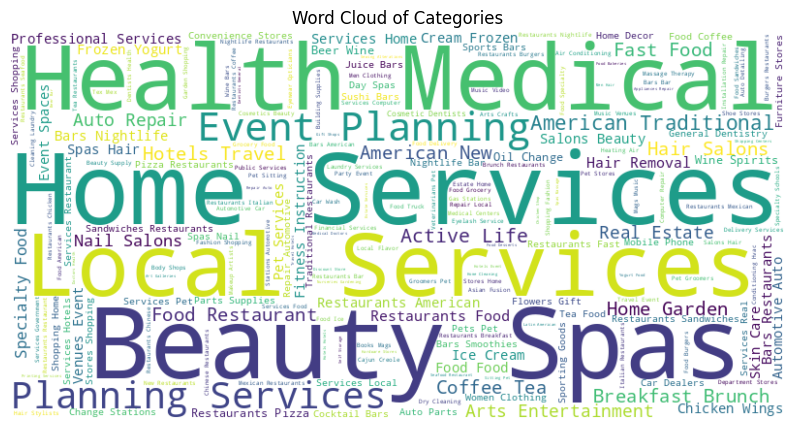

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Combine all the categories texts into a single string
df_no_duplicate_cols['categories'] = df_no_duplicate_cols['categories'].str.title()
text = ' '.join(df_no_duplicate_cols['categories'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()

In [ ]:
# Dividir las categorías en subcategorías y contarlas
subcategories = df_no_duplicate_cols['categories'].str.split(', ').explode()
subcategory_counts = subcategories.value_counts()/len(df_no_duplicate_cols)

# Mostrar el conteo de subcategorías
subcategory_counts.head(20)

Restaurants                  0.347651
Food                         0.184780
Shopping                     0.162259
Home Services                0.095486
Beauty & Spas                0.095061
Nightlife                    0.081685
Health & Medical             0.079084
Local Services               0.074482
Bars                         0.073597
Automotive                   0.071655
Event Planning & Services    0.065815
Sandwiches                   0.055645
American (Traditional)       0.054135
Active Life                  0.051129
Pizza                        0.047178
Coffee & Tea                 0.044584
Fast Food                    0.043047
Breakfast & Brunch           0.041498
American (New)               0.040553
Hotels & Travel              0.038957
Name: categories, dtype: float64

In [ ]:
# APENDX

# 12 CATEGORIAS MAS IMPORTANTES EN YELP
# Dividir las categorías en subcategorías y contarlas
subcategories = florida_cities_postal_code['categories'].str.split(', ').explode()

# Excluded categories
categories = [
    'Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas',
    'Education', 'Event Planning & Services', 'Financial Services', 'Food',
    'Health & Medical', 'Home Services', 'Hotels & Travel', 'Local Flavor',
    'Local Services', 'Mass Media', 'Nightlife', 'Pets', 'Professional Services',
    'Public Services & Government', 'Real Estate', 'Religious Organizations',
    'Restaurants', 'Shopping'
]
# Fuente: https://blog.yelp.com/businesses/yelp_category_list/

# Filtering categories from excluded list and calculating counts
category_counts = subcategories[subcategories.isin(categories)].value_counts()

# Displaying the top 12 categories with counts
top_categories = category_counts.head(12)
top_category_names = top_categories.index

print("Top 12 Categories:")
for category_name, count in zip(top_category_names, top_categories):
    print(f"{category_name}: {count} ({count / len(florida_cities_postal_code):.2%})")


In [ ]:
'''
# Split the 'categories' column into a list of categories
df_unnested['categories_list'] = df_unnested['categories'].str.split(', ')

# Explode the list of categories
df_expanded = df_unnested.explode('categories_list')

# Create a new DataFrame with categories as columns and binary values (1 if present, 0 otherwise)
category_columns = pd.crosstab(df_expanded.index, df_expanded['categories_list']).reset_index()

# Merge the new category columns with the original DataFrame
df_with_categories = pd.concat([df_unnested.reset_index(drop=True), category_columns], axis=1)

# Drop unnecessary columns
columns_to_drop = ['categories', 'categories_list']
df_with_categories = df_with_categories.drop(columns=columns_to_drop)

# Fill NaN values with 0 in the new category columns
category_columns = df_with_categories.filter(like='categories_', axis=1)
df_with_categories[category_columns.columns] = category_columns.fillna(0)

# Rename columns for clarity
df_with_categories.rename(columns=lambda x: x.replace('categories_', ''), inplace=True)
'''